## Requirements

In [91]:
import missingno as msno
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import math

# Input file

In [2]:
df_missing = pd.read_csv("/mnt/workstation/data/dataXid_2complete.csv")
df_missing

,id_cli,edad,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,codigo_ciiu,ctas_activas,ctas_embargadas,...,ciudad_residencia_tag_gasto_familiar,rep_calif_cred_tag_gasto_familiar,genero_tag_ingreso_nompen,estado_civil_tag_ingreso_nompen,nivel_academico_tag_ingreso_nompen,profesion_tag_ingreso_nompen,ocupacion_tag_ingreso_nompen,ciudad_residencia_tag_ingreso_nompen,rep_calif_cred_tag_ingreso_nompen,genero_tag
0,2089776.0,36.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.0,0.0,...,928.0,5.0,NaN,3.0,4.0,22.0,8.0,1178.0,6.0,2
1,2088434.0,33.0,3.0,0.0,0.0,0.0,0.000000e+00,10.0,1.0,0.0,...,907.0,3.0,4.0,2.0,5.0,40.0,2.0,966.0,5.0,1
2,2088089.0,34.0,1.0,0.0,0.0,0.0,0.000000e+00,8230.0,1.0,0.0,...,728.0,NaN,NaN,2.0,NaN,NaN,2.0,1192.0,NaN,2
3,4780572.0,27.0,1.0,0.0,0.0,0.0,1.328622e+07,10.0,1.0,0.0,...,428.0,3.0,NaN,1.0,NaN,54.0,8.0,616.0,5.0,2
4,3894402.0,29.0,1.0,0.0,0.0,0.0,0.000000e+00,1410.0,1.0,0.0,...,428.0,NaN,NaN,1.0,4.0,11.0,2.0,616.0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047950,2892117.0,36.0,0.0,0.0,0.0,0.0,3.375928e+06,4724.0,1.0,0.0,...,428.0,NaN,NaN,2.0,2.0,NaN,1.0,616.0,NaN,2
1047951,4772894.0,34.0,1.0,0.0,0.0,0.0,0.000000e+00,8299.0,1.0,0.0,...,428.0,5.0,4.0,1.0,NaN,NaN,2.0,616.0,6.0,1
1047952,4774849.0,25.0,0.0,0.0,0.0,0.0,0.000000e+00,10.0,1.0,0.0,...,428.0,3.0,4.0,3.0,NaN,NaN,8.0,616.0,5.0,1
1047953,3895049.0,30.0,0.0,0.0,0.0,0.0,1.922503e+06,10.0,1.0,0.0,...,974.0,1.0,NaN,2.0,NaN,NaN,8.0,1117.0,2.0,2


In [3]:
missing = df_missing.isnull().sum()/df_missing.shape[0]*100
missing = pd.DataFrame(missing)
missing

,0
id_cli,0.000000
edad,0.000000
mora_max,0.000000
cant_moras_30_ult_12_meses,0.000000
cant_moras_60_ult_12_meses,0.000000
...,...
profesion_tag_ingreso_nompen,28.774709
ocupacion_tag_ingreso_nompen,0.304593
ciudad_residencia_tag_ingreso_nompen,0.054869
rep_calif_cred_tag_ingreso_nompen,9.020903


In [4]:
Var_missing = missing[missing[0]!=0].index
#tmp = df_missing[Var_missing]
Var_missing

Index(['ctas_activas', 'ctas_embargadas', 'mediana_nom3_desv',
       'mediana_pen3_desv', 'ingreso_nompen_desv', 'ingreso_final_desv',
       'ingreso_final', 'pol_centr_ext', 'saldo_prom3_tdc_mdo', 'cupo_tc_mdo',
       'saldo_no_rot_mdo', 'ind', 'gasto_familiar', 'genero_tag_ind',
       'estado_civil_tag_ind', 'nivel_academico_tag_ind', 'profesion_tag_ind',
       'ocupacion_tag_ind', 'ciudad_residencia_tag_ind',
       'rep_calif_cred_tag_ind', 'genero_tag_gasto_familiar',
       'estado_civil_tag_gasto_familiar', 'nivel_academico_tag_gasto_familiar',
       'profesion_tag_gasto_familiar', 'ocupacion_tag_gasto_familiar',
       'ciudad_residencia_tag_gasto_familiar',
       'rep_calif_cred_tag_gasto_familiar', 'genero_tag_ingreso_nompen',
       'estado_civil_tag_ingreso_nompen', 'nivel_academico_tag_ingreso_nompen',
       'profesion_tag_ingreso_nompen', 'ocupacion_tag_ingreso_nompen',
       'ciudad_residencia_tag_ingreso_nompen',
       'rep_calif_cred_tag_ingreso_nompen'],
   

In [5]:
df_missing[Var_missing].describe().T

,count,mean,std,min,25%,50%,75%,max
ctas_activas,1047954.0,1.049415e+00,4.020435e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01
ctas_embargadas,1047954.0,3.114641e-03,5.917691e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
mediana_nom3_desv,1046259.0,4.712045e+05,1.152793e+06,0.000000e+00,0.000000e+00,0.000000e+00,6.090592e+05,1.540409e+08
mediana_pen3_desv,1046259.0,1.512951e+04,2.755934e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.886119e+08
ingreso_nompen_desv,1046259.0,4.910243e+05,1.197254e+06,0.000000e+00,0.000000e+00,2.388707e+04,6.334621e+05,1.908578e+08
ingreso_final_desv,1046194.0,1.452007e+06,4.568443e+06,1.489323e+01,3.252429e+05,7.272076e+05,1.497378e+06,1.430676e+09
ingreso_final,1047874.0,4.935805e+06,1.285455e+07,9.340157e+04,1.824639e+06,2.898943e+06,4.976615e+06,3.193947e+09
pol_centr_ext,811373.0,6.995525e-01,2.145768e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
saldo_prom3_tdc_mdo,1046259.0,1.928937e+06,6.779072e+06,0.000000e+00,0.000000e+00,0.000000e+00,8.435322e+05,4.844083e+08
cupo_tc_mdo,1046259.0,7.618836e+06,1.915890e+07,0.000000e+00,0.000000e+00,0.000000e+00,6.725504e+06,6.379191e+08


## Imputation PPCA R results

In [380]:
df_complete = pd.read_csv("/mnt/workstation/data/DataXid_full.csv")
df_complete = df_complete.iloc[:,1:]
df_complete.columns

Index(['id_cli', 'edad', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'codigo_ciiu', 'ctas_activas', 'ctas_embargadas',
       'mediana_nom3', 'ind_mora_vigente', 'cartera_castigada', 'tenencia_tc',
       'tiene_consumo', 'tiene_crediagil', 'tiene_ctas_activas',
       'tiene_ctas_embargadas', 'pension_fopep', 'tiene_cred_hipo_1',
       'tiene_cred_hipo_2', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'mediana_nom3_desv',
       'mediana_pen3_desv', 'ingreso_nompen_desv', 'ingreso_final_desv',
       'ingreso_nompen', 'ingreso_final', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota_rotativos', 'cuota_de_sector_solidario',
       'cuota_sector_real_comercio', 'pol_centr_ext', 'saldo_prom3_tdc_mdo',
       'cupo_tc_mdo', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr',
       'saldo_no_rot_mdo', 'ind', 'gasto_familiar', 'genero_tag_ind',
       'estado_civil_tag_ind', 'ni

In [299]:
df_complete[Var_missing].describe().T

,count,mean,std,min,25%,50%,75%,max
ctas_activas,1047955.0,1.049415e+00,4.020433e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01
ctas_embargadas,1047955.0,3.114640e-03,5.917688e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
mediana_nom3_desv,1047955.0,4.713052e+05,1.151933e+06,0.000000e+00,0.000000e+00,0.000000e+00,6.088375e+05,1.540409e+08
mediana_pen3_desv,1047955.0,1.513943e+04,2.753733e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.886119e+08
ingreso_nompen_desv,1047955.0,4.911346e+05,1.196369e+06,0.000000e+00,0.000000e+00,2.456944e+04,6.333055e+05,1.908578e+08
ingreso_final_desv,1047955.0,1.452661e+06,4.565949e+06,-2.997322e+07,3.257600e+05,7.280716e+05,1.498536e+06,1.430676e+09
ingreso_final,1047955.0,4.935711e+06,1.285492e+07,-1.124808e+08,1.824695e+06,2.898894e+06,4.976655e+06,3.193947e+09
pol_centr_ext,1047955.0,7.030667e-01,1.892722e+00,-2.486086e+01,0.000000e+00,0.000000e+00,7.371807e-01,2.206269e+01
saldo_prom3_tdc_mdo,1047955.0,1.932096e+06,6.786446e+06,-4.347998e+06,0.000000e+00,0.000000e+00,8.468782e+05,4.844083e+08
cupo_tc_mdo,1047955.0,7.632176e+06,1.922398e+07,-1.411898e+07,0.000000e+00,0.000000e+00,6.725504e+06,6.379191e+08


## Preview

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has

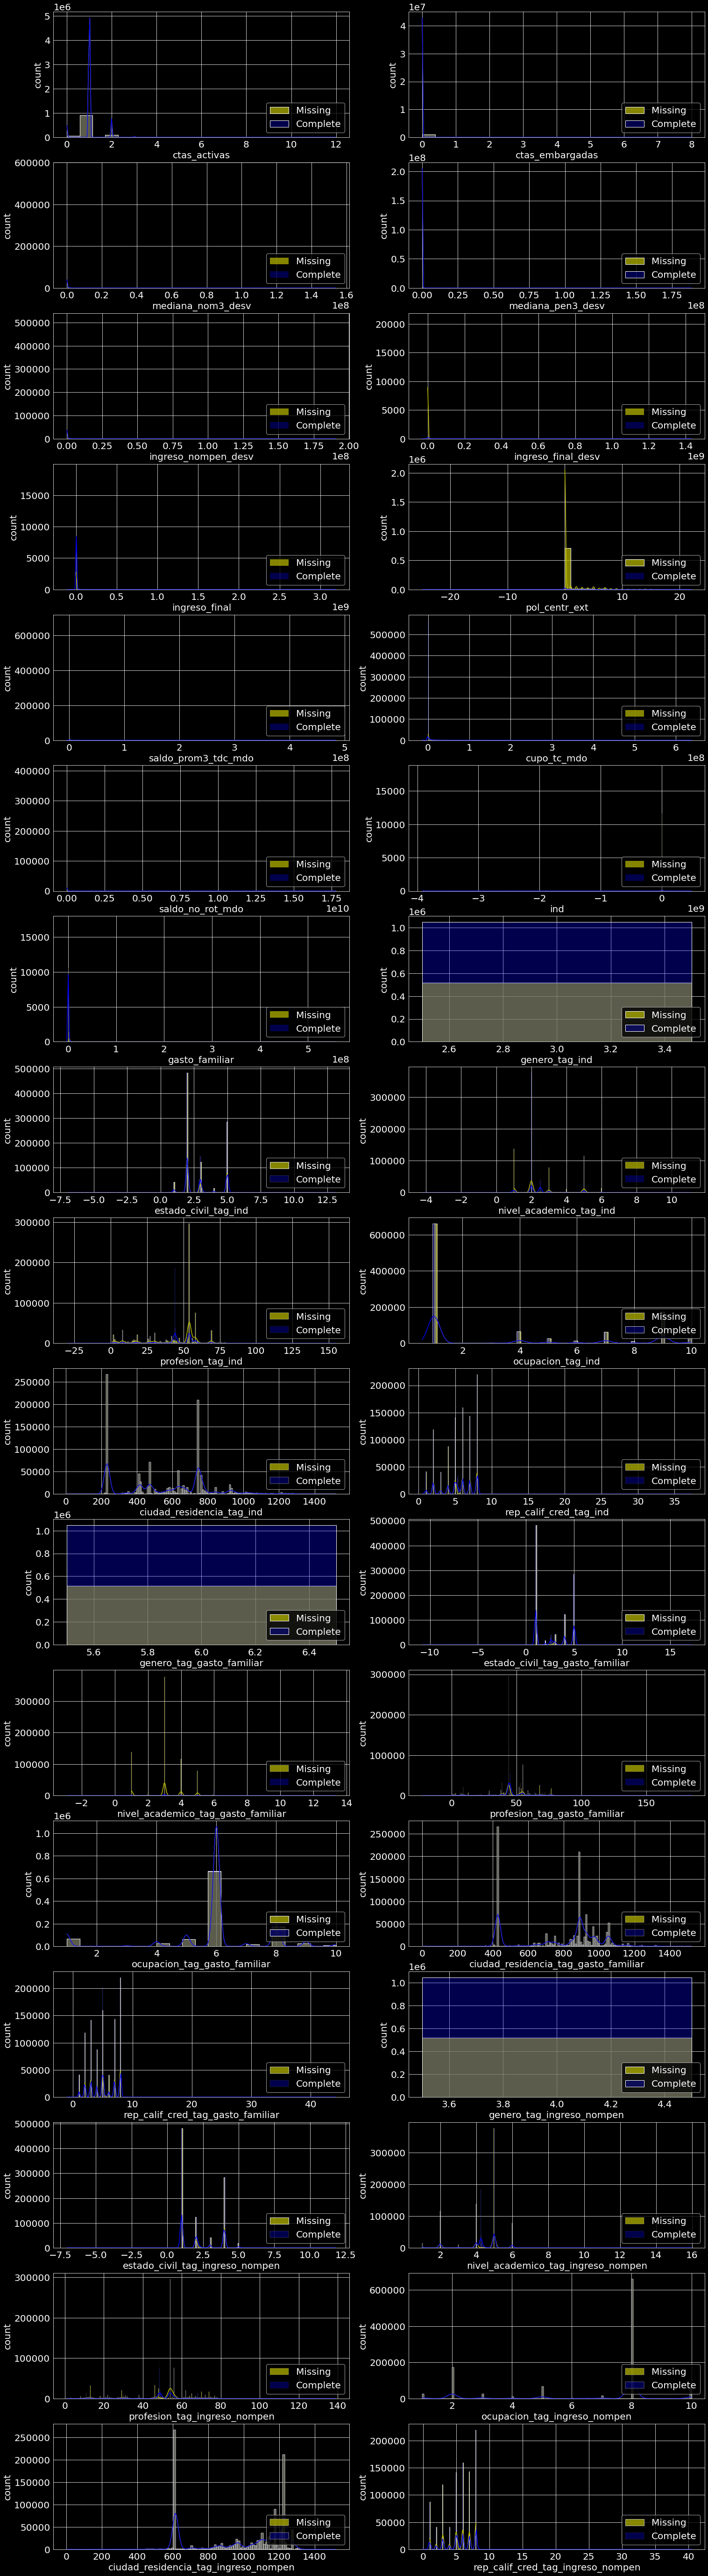

In [34]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = Var_missing
plt.figure(figsize=(25,25*4))
plt.title("Distribución de Variables Numericas")
for i,var in enumerate(var_hist):
    plt.subplot(17,2,i+1)
    sns.histplot(df_missing[var], color='y', kde=True , label='Missing', alpha = 0.7)
    sns.histplot(df_complete[var], color='b', kde=True, label='Complete',alpha = 0.3)
    plt.legend(loc=4)
    plt.xlabel(var)
    #plt.tight_layout()
    plt.ylabel("count")

## Integer verification

In [381]:
features = pd.DataFrame(df_missing.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index
features_i

Index(['ind_mora_vigente', 'cartera_castigada', 'tenencia_tc', 'tiene_consumo',
       'tiene_crediagil', 'tiene_ctas_activas', 'tiene_ctas_embargadas',
       'pension_fopep', 'tiene_cred_hipo_1', 'tiene_cred_hipo_2',
       'genero_tag'],
      dtype='object')

In [382]:
for i in features_i:
    df_complete[i] = df_complete[i].round()

In [383]:
features_o = ['genero_tag_ind',
                'estado_civil_tag_ind',
                'nivel_academico_tag_ind',
                'profesion_tag_ind',
                'ocupacion_tag_ind', 
                'ciudad_residencia_tag_ind',
                'rep_calif_cred_tag_ind',
                'genero_tag_gasto_familiar',
                'estado_civil_tag_gasto_familiar',
                'nivel_academico_tag_gasto_familiar',
                'profesion_tag_gasto_familiar', 
                'ocupacion_tag_gasto_familiar',
                'ciudad_residencia_tag_gasto_familiar',
                'rep_calif_cred_tag_gasto_familiar',
                'genero_tag_ingreso_nompen',
                'estado_civil_tag_ingreso_nompen',
                'nivel_academico_tag_ingreso_nompen',
                'profesion_tag_ingreso_nompen',
                'ocupacion_tag_ingreso_nompen',
                'ciudad_residencia_tag_ingreso_nompen',
                'rep_calif_cred_tag_ingreso_nompen',
                'genero_tag']

In [384]:
for i in features_o:
    df_complete[i] = [math.ceil(x) for x in df_complete[i]]
    df_complete[i] = df_complete[i].astype('int')

In [385]:
df_complete['estado_civil_tag_ind'].value_counts()

 2     482246
 5     285022
 3     196750
 4      42562
 1      41306
 6         49
 7         12
 8          3
-7          1
 14         1
 13         1
 10         1
 9          1
Name: estado_civil_tag_ind, dtype: int64

## Outliers verification

In [386]:
for i in Var_missing:
    ind = df_complete[df_complete[i] > np.nanmax(df_missing[i])].index
    df_complete.loc[ind,i] =  np.nanmax(df_missing[i])
    ind = df_complete[df_complete[i] < np.nanmin(df_missing[i])].index
    df_complete.loc[ind,i] =  np.nanmin(df_missing[i])

In [387]:
df_complete['estado_civil_tag_ind'].value_counts()

2.0    482246
5.0    285090
3.0    196750
4.0     42562
1.0     41307
Name: estado_civil_tag_ind, dtype: int64

## Unlabeling

In [268]:
labels = pd.read_csv("/mnt/workstation/data/labels.csv")
labels

,Categoria,Particip,Variable,Label,Var_mean
0,CASADO,9.678370e+05,estado_civil,5,gasto_familiar
1,UNION LIBRE,8.678049e+05,estado_civil,4,gasto_familiar
2,DIVORCIADO,7.881397e+05,estado_civil,3,gasto_familiar
3,VIUDO,6.969590e+05,estado_civil,2,gasto_familiar
4,SOLTERO,6.912766e+05,estado_civil,1,gasto_familiar
...,...,...,...,...,...
9109,D,1.101550e+06,rep_calif_cred,5,ingreso_nompen
9110,F,1.099701e+06,rep_calif_cred,4,ingreso_nompen
9111,G,1.099355e+06,rep_calif_cred,3,ingreso_nompen
9112,H,1.095841e+06,rep_calif_cred,2,ingreso_nompen


In [388]:
features_o = ['estado_civil',
              'nivel_academico',
              'profesion',
              'ocupacion',
              'ciudad_residencia',
              'rep_calif_cred']

In [389]:
for j in ['gasto_familiar']:#,'ind','ingreso_nompen']:
    for i in features_o:
        tag = labels[labels['Var_mean'] ==j]
        tmp = pd.pivot_table(tag[tag['Variable'] == i][['Categoria','Label']],
                       values='Label',
                       columns='Categoria').round()
        tmp = tmp.T
        #tmp['Label'] = [math.ceil(x) for x in tmp['Label']]
        tmp = tmp.reset_index()
        tmp.index = tmp['Label']
        tmp = tmp.to_dict()['Categoria']
        nueva_variable = i#+'_tag_'+j
        variable_tag = i+'_tag_'+j
        df_complete[nueva_variable] = df_complete[variable_tag].map(tmp)

In [390]:
df_complete

,id_cli,edad,mora_max,cant_moras_30_ult_12_meses,cant_moras_60_ult_12_meses,cant_moras_90_ult_12_meses,cupo_total_tc,codigo_ciiu,ctas_activas,ctas_embargadas,...,ocupacion_tag_ingreso_nompen,ciudad_residencia_tag_ingreso_nompen,rep_calif_cred_tag_ingreso_nompen,genero_tag,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred
0,2089776.0,36,0,0,0,0,0.000000e+00,10,1.0,0.0,...,8.0,1178.0,6.0,2,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C
1,2088434.0,33,3,0,0,0,0.000000e+00,10,1.0,0.0,...,2.0,966.0,5.0,1,UNION LIBRE,UNIVERSITARIO,VETERINARIA,Independiente,SANDONA,D
2,2088089.0,34,1,0,0,0,0.000000e+00,8230,1.0,0.0,...,2.0,1192.0,6.0,2,UNION LIBRE,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,TENERIFE,C
3,4780572.0,27,1,0,0,0,1.328622e+07,10,1.0,0.0,...,8.0,616.0,5.0,2,SOLTERO,BACHILLER,OTROS,Empleado,PEDRAZA,D
4,3894402.0,29,1,0,0,0,0.000000e+00,1410,1.0,0.0,...,2.0,616.0,6.0,2,SOLTERO,TECNOLOGO,DISEÑO Y PUBLICIDAD,Independiente,PEDRAZA,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047950,2892117.0,36,0,0,0,0,3.375928e+06,4724,1.0,0.0,...,1.0,616.0,6.0,2,UNION LIBRE,BACHILLER,QUIMICA FARMACEUTICA,Comerciante,PEDRAZA,F
1047951,4772894.0,34,1,0,0,0,0.000000e+00,8299,1.0,0.0,...,2.0,616.0,6.0,1,SOLTERO,UNIVERSITARIO,MERCADOTECNIA,Independiente,PEDRAZA,C
1047952,4774849.0,25,0,0,0,0,0.000000e+00,10,1.0,0.0,...,8.0,616.0,5.0,1,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Empleado,PEDRAZA,D
1047953,3895049.0,30,0,0,0,0,1.922503e+06,10,1.0,0.0,...,8.0,1117.0,2.0,2,UNION LIBRE,BACHILLER,QUIMICA FARMACEUTICA,Empleado,ARMENIA,H


In [391]:
df_complete['genero_tag'].value_counts()

2    530231
1    517724
Name: genero_tag, dtype: int64

In [392]:
conditions = [
    (df_complete['genero_tag'] == 2),
    (df_complete['genero_tag'] == 1)
]
values = ['M','F']
df_complete['genero'] = np.select(conditions, values)

In [393]:
df_complete['genero'].value_counts()

M    530231
F    517724
Name: genero, dtype: int64

In [394]:
df_complete = df_complete.drop(columns=['genero_tag_ind',
                                'genero_tag_gasto_familiar',
                                'genero_tag_ingreso_nompen',
                                ], axis=0)

# Final Stats

In [395]:
features = pd.DataFrame(df_complete.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [396]:
df_complete[features_o].describe().T

,count,unique,top,freq
estado_civil,1047955,5,SOLTERO,482249
nivel_academico,1047955,6,UNIVERSITARIO,574574
profesion,1047955,79,OTROS,296452
ocupacion,1047955,10,Empleado,664455
ciudad_residencia,1047955,899,PEDRAZA,266005
rep_calif_cred,1047955,8,A,221248
genero,1047955,2,M,530231


In [364]:
df_complete[features_i].describe().T

,count,mean,std,min,25%,50%,75%,max
edad,1047955.0,41.983669,13.775499,19.0,31.0,39.0,51.0,120.0
mora_max,1047955.0,7.858711,30.531716,0.0,0.0,0.0,1.0,3367.0
cant_moras_30_ult_12_meses,1047955.0,0.138006,0.817912,0.0,0.0,0.0,0.0,12.0
cant_moras_60_ult_12_meses,1047955.0,0.072581,0.633295,0.0,0.0,0.0,0.0,12.0
cant_moras_90_ult_12_meses,1047955.0,0.048125,0.523726,0.0,0.0,0.0,0.0,12.0
codigo_ciiu,1047955.0,911.117580,2315.125702,0.0,10.0,10.0,10.0,9900.0
ind_mora_vigente,1047955.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
cartera_castigada,1047955.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
tenencia_tc,1047955.0,0.363904,0.481122,0.0,0.0,0.0,1.0,1.0
tiene_consumo,1047955.0,0.134115,0.340777,0.0,0.0,0.0,0.0,1.0


In [377]:
df_complete[features_f].describe().T

,count,mean,std,min,25%,50%,75%,max
id_cli,1047955.0,3.400356e+06,2.464904e+06,3.000000e+00,1.375613e+06,2.901195e+06,4.956733e+06,8.704800e+06
cupo_total_tc,1047955.0,4.281256e+06,1.007153e+07,0.000000e+00,0.000000e+00,0.000000e+00,4.614967e+06,5.451097e+08
ctas_activas,1047955.0,1.049415e+00,4.020433e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01
ctas_embargadas,1047955.0,3.114640e-03,5.917688e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
mediana_nom3,1047955.0,9.951355e+05,2.459760e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.388228e+06,4.650000e+08
mediana_nom3_desv,1047955.0,4.713052e+05,1.151933e+06,0.000000e+00,0.000000e+00,0.000000e+00,6.088375e+05,1.540409e+08
mediana_pen3_desv,1047955.0,1.513943e+04,2.753733e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.886119e+08
ingreso_nompen_desv,1047955.0,4.911346e+05,1.196369e+06,0.000000e+00,0.000000e+00,2.456944e+04,6.333055e+05,1.908578e+08
ingreso_final_desv,1047955.0,1.452705e+06,4.565815e+06,1.489323e+01,3.257600e+05,7.280716e+05,1.498536e+06,1.430676e+09
ingreso_nompen,1047955.0,1.226524e+06,2.252032e+06,0.000000e+00,0.000000e+00,8.214212e+04,1.773108e+06,1.678365e+08


/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/pip_envs/Debuggers3.6/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has

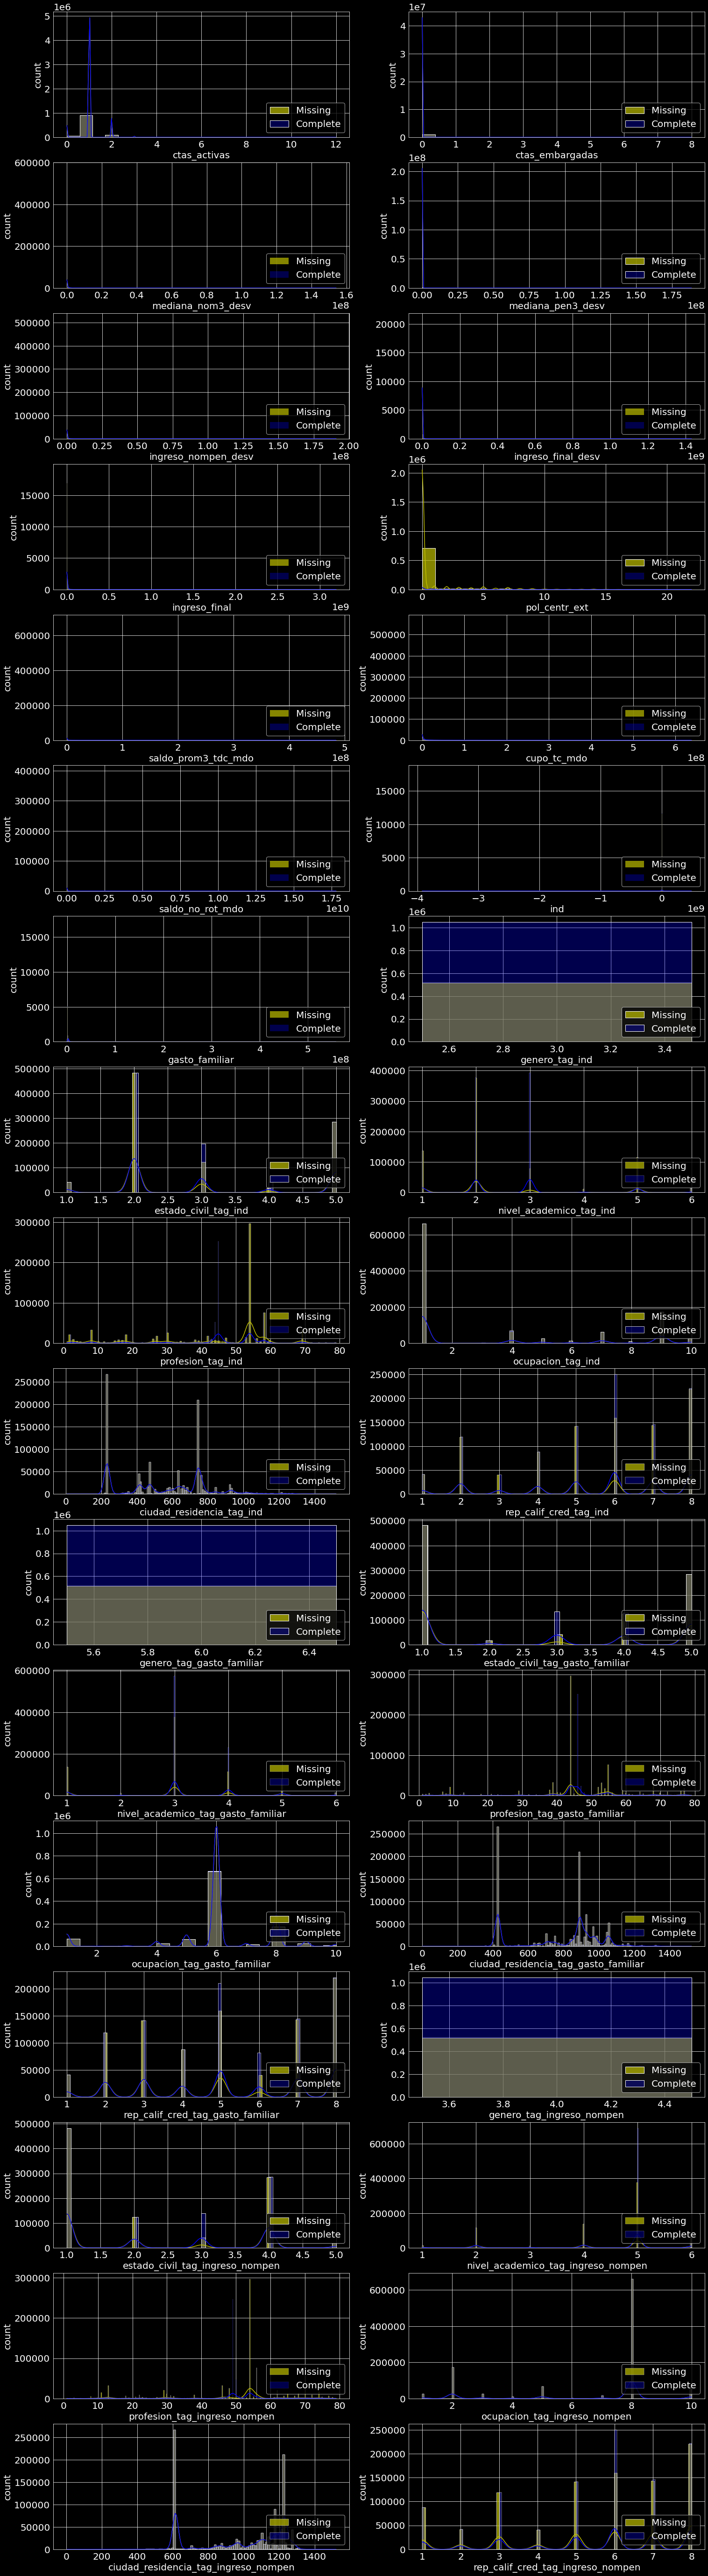

In [366]:
plt.rcParams.update({'font.size': 20})
sns.set_style('darkgrid')
plt.style.use("dark_background")
var_hist = Var_missing
plt.figure(figsize=(25,25*4))
plt.title("Distribución de Variables Numericas")
for i,var in enumerate(var_hist):
    plt.subplot(17,2,i+1)
    sns.histplot(df_missing[var], color='y', kde=True , label='Missing', alpha = 0.7)
    sns.histplot(df_complete[var], color='b', kde=True, label='Complete',alpha = 0.3)
    plt.legend(loc=4)
    plt.xlabel(var)
    plt.ylabel("count")

In [397]:
df_complete.to_csv("/mnt/workstation/data/DataXid_full_ok.csv", index=False)
df_complete.shape

(1047955, 68)